In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Introduction and data preparation

It's time to load the dataset and prepare it for our analysis. First, we'll read it with the usual `read_csv`, but we'll use the special `parse_dates` argument to read `Released` and `Updated` as date types.

In [3]:
df = pd.read_csv('apple_store_apps_with_reviews.csv.zip', parse_dates=['Released', 'Updated'])

In [12]:
df.columns

Index(['App_Name', 'Primary_Genre', 'Content_Rating', 'Size_Bytes',
       'Required_IOS_Version', 'Released', 'Updated', 'Version', 'Price',
       'Currency', 'Free', 'Developer', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews',
       'Average Size in MB'],
      dtype='object')

### Warm Up activities

##### 1. Create a column `Average Size in MB` using the column `Size_Bytes`

In [4]:
df['Average Size in MB'] = df["Size_Bytes"]/1048576



##### 2. Find the top 20 apps by number of reviews

In [13]:
top_20_apps_df = df.sort_values(by="Reviews", ascending = False).head(20)
top_20_apps_df

,App_Name,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,Developer,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Average Size in MB
187555,"YouTube: Watch, Listen, Stream",Photo & Video,17+,261849088.0,12.0,2012-09-11 07:23:19,2021-10-10 23:03:29,16.40.3,0.0,USD,True,Google LLC,4.68757,22685334,4.68757,22685334,249.718750
458019,Instagram,Photo & Video,12+,193046528.0,12.0,2010-10-06 08:12:41,2021-10-13 11:48:53,209.1,0.0,USD,True,"Instagram, Inc.",4.74680,21839585,4.74680,21839585,184.103516
293224,Spotify New Music and Podcasts,Music,12+,154742784.0,12.0,2011-07-14 11:22:37,2021-10-08 06:46:57,8.6.68,0.0,USD,True,Spotify Ltd.,4.78328,18893225,4.78328,18893225,147.574219
221848,Venmo,Finance,4+,372536320.0,12.0,2010-04-03 05:41:47,2021-10-08 04:00:00,9.5.1,0.0,USD,True,Venmo,4.86932,12634191,4.86932,12634191,355.278320
261540,DoorDash - Food Delivery,Food & Drink,12+,271894528.0,14.0,2013-10-10 19:46:20,2021-10-11 04:07:03,4.57.0,0.0,USD,True,"DoorDash, Inc.",4.76992,12517538,4.76992,12517538,259.298828
208424,TikTok,Entertainment,12+,452265984.0,9.3,2014-04-02 22:44:45,2021-09-09 13:51:15,21.1.0,0.0,USD,True,TikTok Pte. Ltd.,4.73975,10598509,4.73975,10598509,431.314453
443039,Lyft,Travel,4+,457876480.0,12.0,2012-05-31 00:43:05,2021-10-11 17:16:12,7.5.3,0.0,USD,True,"Lyft, Inc.",4.91553,10241777,4.91553,10241777,436.665039
514711,WhatsApp Messenger,Social Networking,12+,192001024.0,10.0,2009-05-04 02:43:49,2021-10-13 17:27:15,2.21.200,0.0,USD,True,WhatsApp Inc.,4.69416,9090956,4.69416,9090956,183.106445
430197,Pandora: Music & Podcasts,Music,12+,175702016.0,13.0,2019-02-01 08:00:00,2021-09-29 15:32:55,2108.1.1,0.0,USD,True,"Pandora Media, Inc.",4.78196,8297798,4.78196,8297798,167.562500
9163,Bible,Reference,4+,189624320.0,13.0,2019-02-12 08:00:00,2021-10-11 07:02:47,9.2.3,0.0,USD,True,Life.Church,4.90797,7181127,4.90797,7181127,180.839844


### Activities

#### Histograms

##### 3. Create a histogram showing the number of reviews an app get

<Axes: title={'center': 'Distributions of Reviews in the AppStore'}, ylabel='Frequency'>

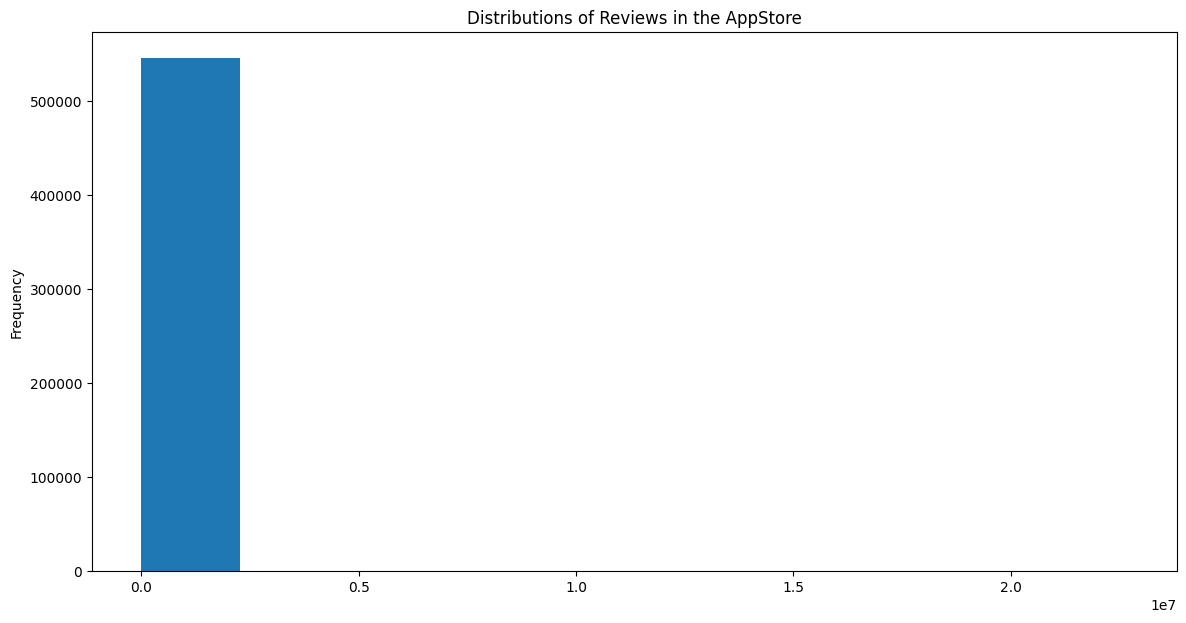

In [39]:
fig, ax = plt.subplots(figsize=(14, 7))

df["Reviews"].plot(kind="hist", title='Distributions of Reviews in the AppStore', ax=ax)

##### 4. Plot the distribution of Reviews with `100` bins and a Y limit to `100`

<Axes: title={'center': 'Distributions of Reviews in the AppStore (max 100 apps per bin)'}, ylabel='Frequency'>

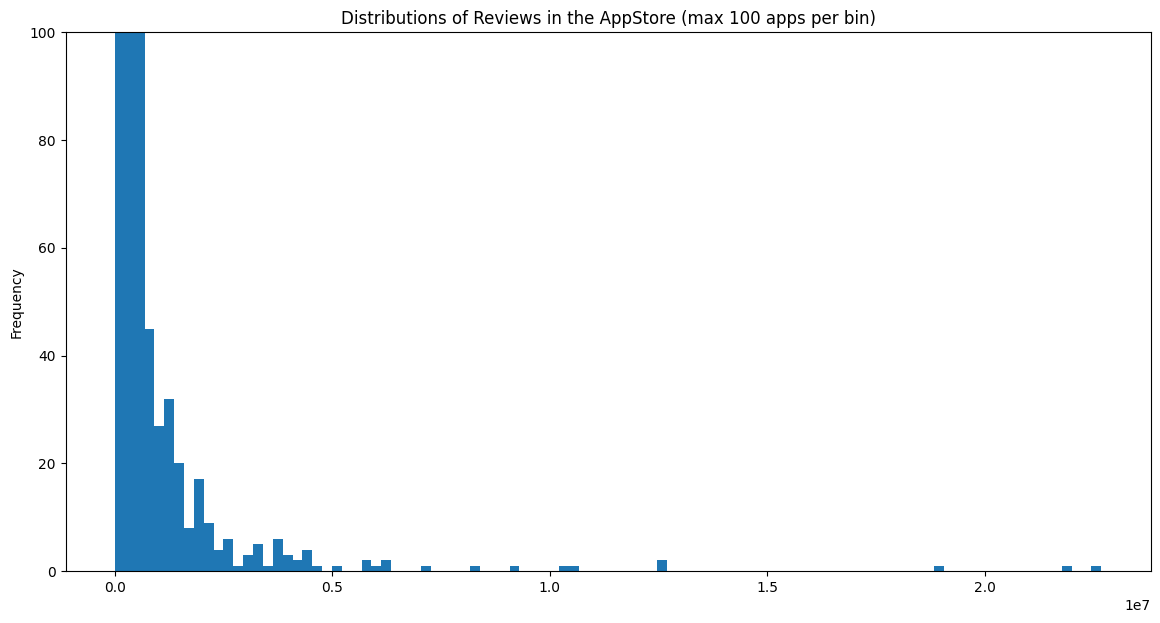

In [49]:
fig, ax = plt.subplots(figsize=(14, 7))

df["Reviews"].plot(kind="hist", bins=100, ylim=(0,100), title='Distributions of Reviews in the AppStore (max 100 apps per bin)', ax=ax)


##### 5. Plot the same distribution as before, but improve the X-axis format

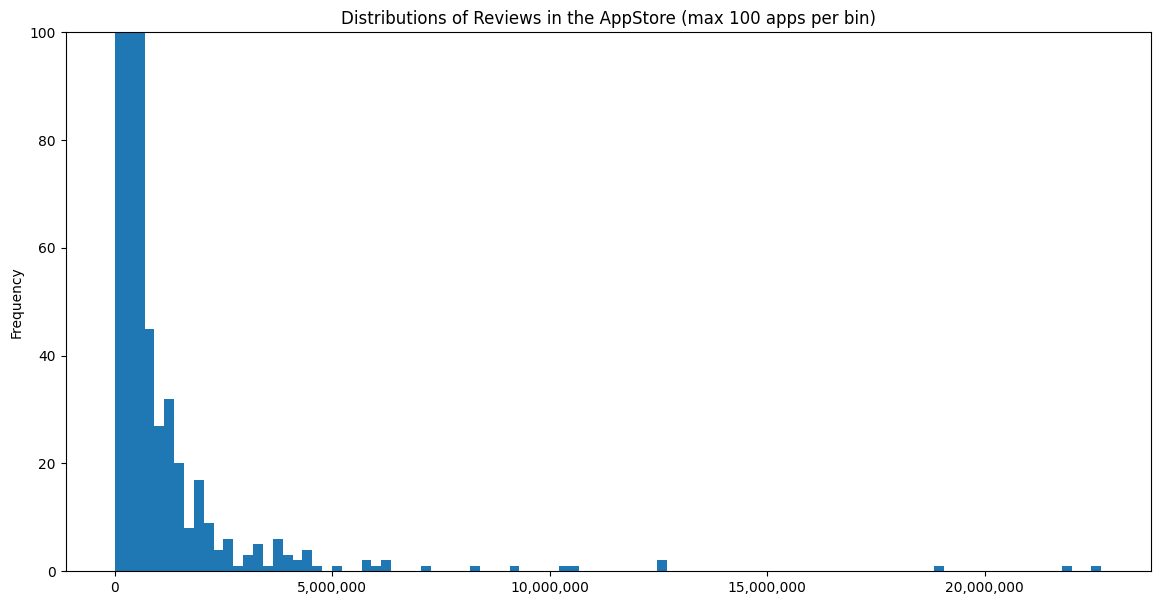

In [64]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(14, 7))

df['Reviews'].plot(kind='hist', bins=100, ylim=(0, 100), title='Distributions of Reviews in the AppStore (max 100 apps per bin)', ax=ax)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))



#### Line and Scatter Plots

The following code is provided to you as is, don't change it, just execute it. It might look a little bit more advanced, but don't worry, you'll eventually get there!

In [6]:
monthly_app_summary_df = df.groupby(pd.Grouper(key='Released', freq='M')).agg({
    'App_Name': 'size',
    'Average Size in MB': 'mean'
}).reset_index().rename(columns={
    'Released': 'Month Released',
    'App_Name': 'Total Apps Released',
})

monthly_app_summary_df.head()

,Month Released,Total Apps Released,Average Size in MB
0,2008-09-30,17,30.305706
1,2008-10-31,179,36.483144
2,2008-11-30,200,47.255943
3,2008-12-31,195,51.085548
4,2009-01-31,207,48.374146


##### 6. Create a line plot that displays the total apps released by month

<Axes: title={'center': 'Total apps released per month'}, xlabel='Month Released'>

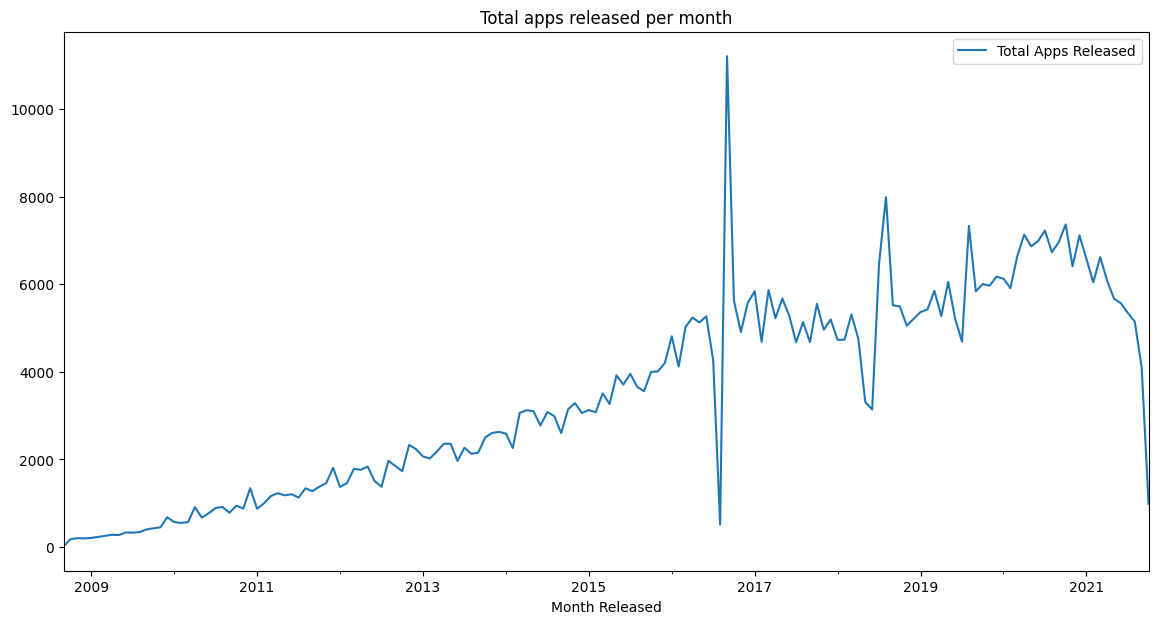

In [76]:
fig, ax = plt.subplots(figsize=(14, 7))

monthly_app_summary_df.plot(y= "Total Apps Released", x="Month Released", ax=ax, title="Total apps released per month")

##### 7. Create a scatter plot showing the `Month Released` in the X-axis and `Average Size in MB` in the Y-axis

<Axes: title={'center': 'Average size of apps over time'}, xlabel='Month Released', ylabel='Average Size in MB'>

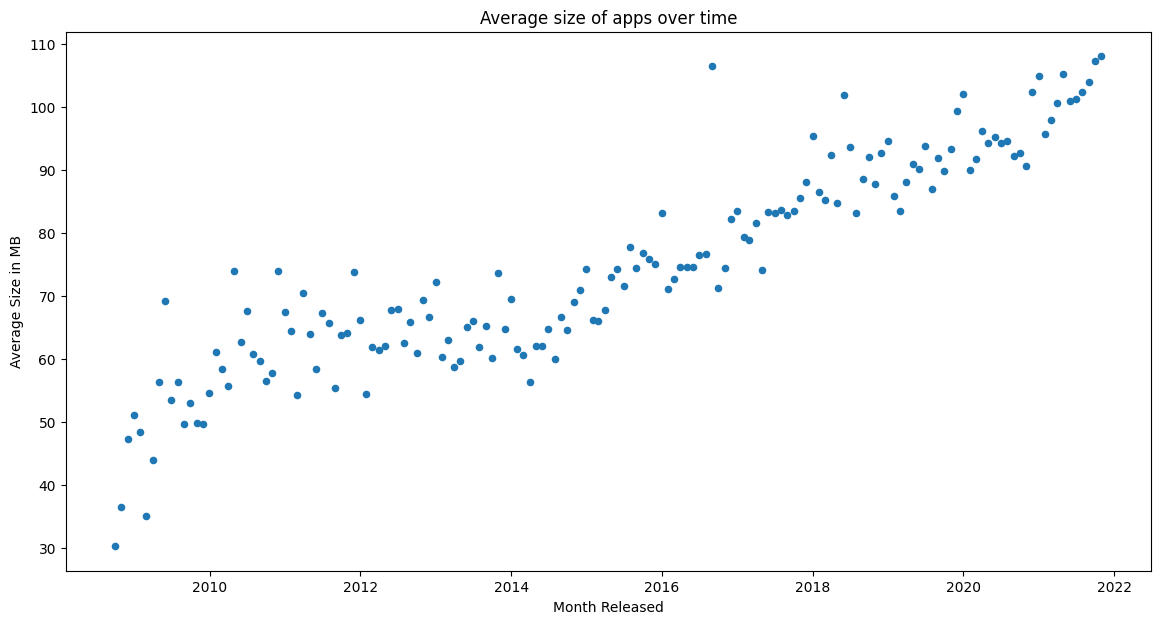

In [84]:
fig, ax = plt.subplots(figsize=(14, 7))

monthly_app_summary_df.plot(kind="scatter", y="Average Size in MB", x="Month Released",
                            title="Average size of apps over time", ax=ax)

##### 8. Create a scatter plot that shows the number of reviews in the X axis, and the rating on the Y axis

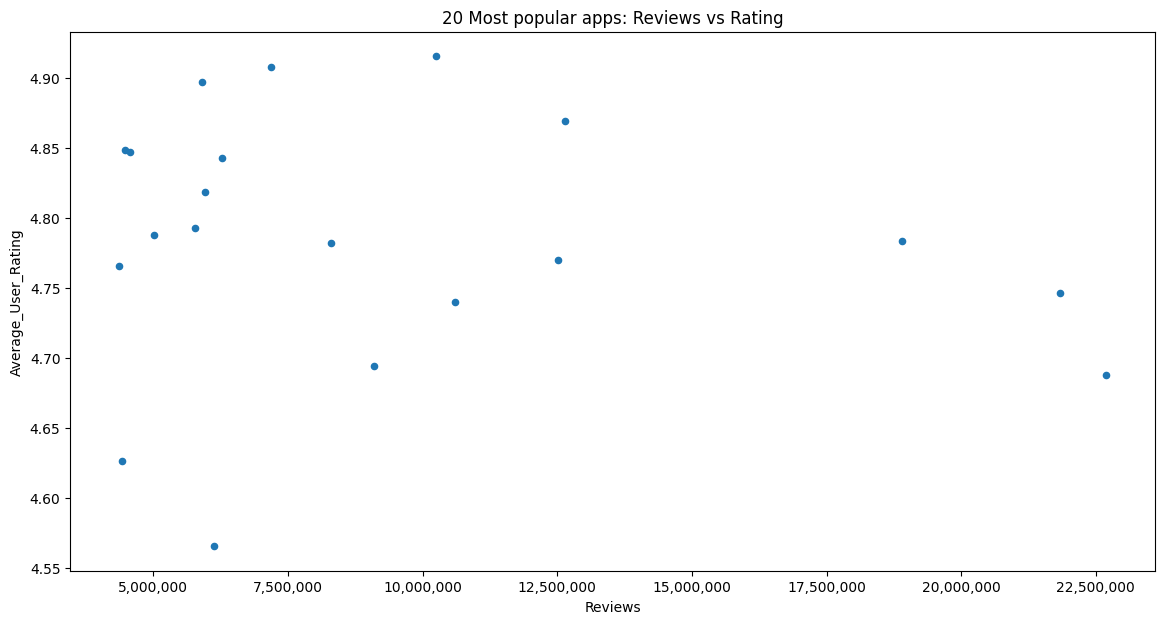

In [92]:
fig, ax = plt.subplots(figsize=(14, 7))
top_20_apps_df.plot(kind="scatter", x="Reviews", y="Average_User_Rating"
                    , title="20 Most popular apps: Reviews vs Rating", ax=ax)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


##### 9. Modify the previous plot to show the size of each bubble based on the size of the app in Megabytes

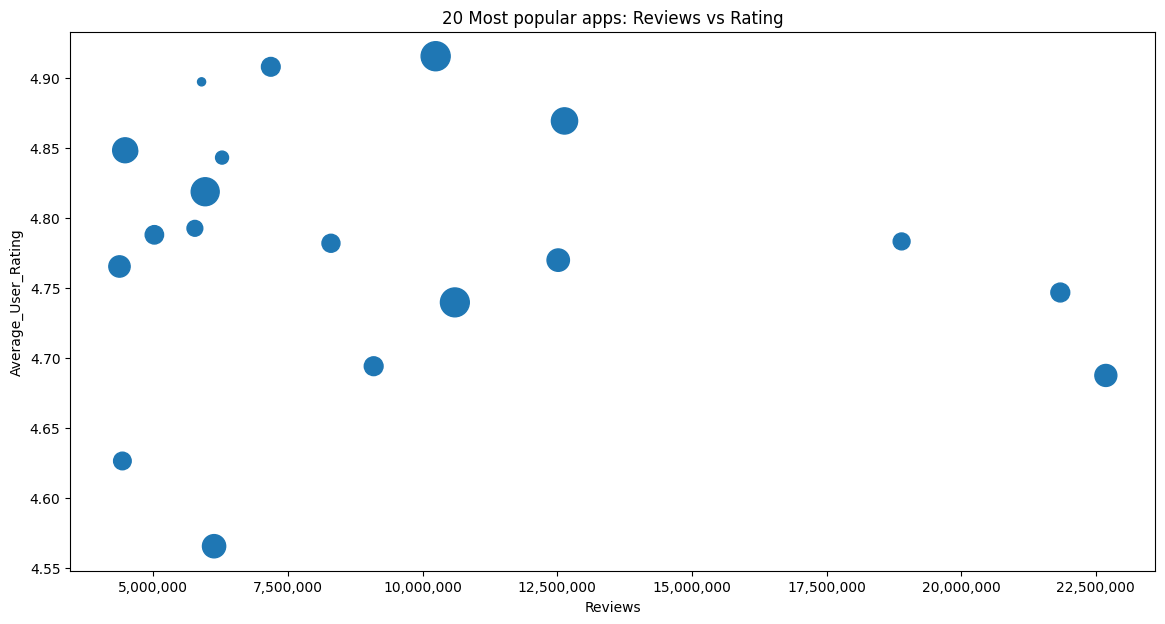

In [97]:
fig, ax = plt.subplots(figsize=(14, 7))
top_20_apps_df.plot(kind="scatter", x="Reviews", y="Average_User_Rating"
                    , title="20 Most popular apps: Reviews vs Rating", s = "Average Size in MB", ax=ax)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

#### Bar charts

Bar charts show a categorical variable on the X axis, and a magnitude for that given category in the Y-axis. So, the data that you'll need to plot will need to change or be grouped by that category in order to display it. For example, how many Free vs Paid apps are there? The easiest way to compute that using pandas is with the `value_counts()` method:

In [99]:
df['Free'].value_counts()

Free
True     496739
False     49317
Name: count, dtype: int64

With `value_counts()`, we have quickly grouped the data by the `Free` categorical variable, and we have the magnitude of *"how many"* apps are free

Now that we have a new trick under our belt, let's keep building some visualizations!

##### 10. Create a bar chart comparing the total number of `Free` to `Paid` apps

<Axes: title={'center': 'Free vs Paid apps on the AppStore'}, xlabel='Free'>

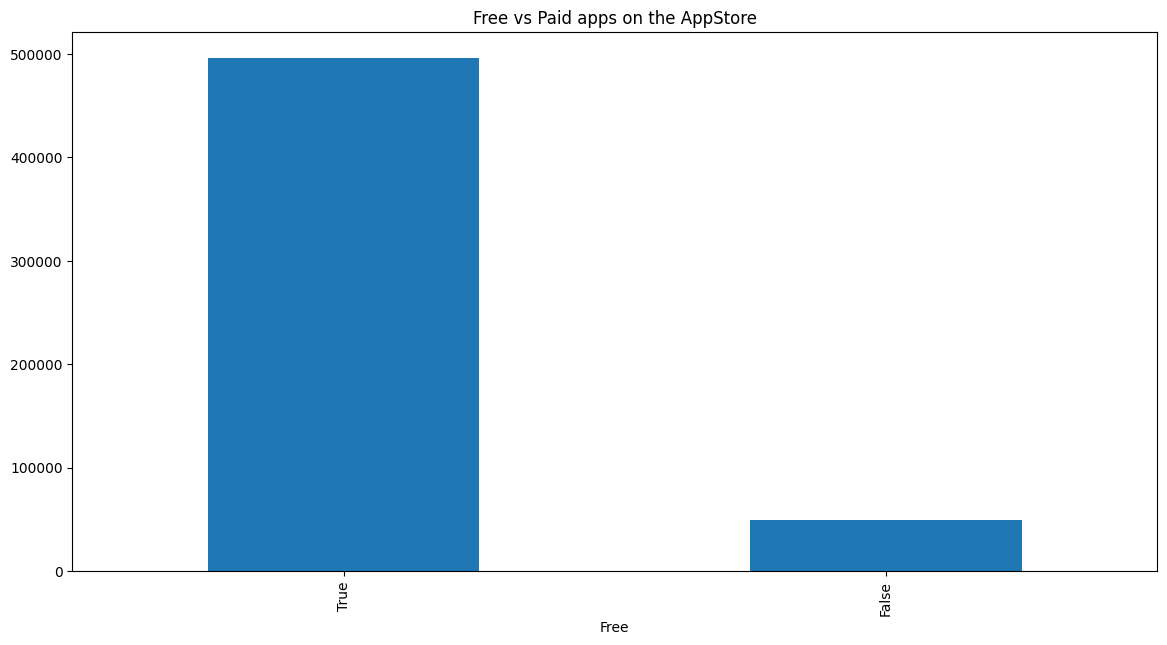

In [105]:
fig, ax = plt.subplots(figsize=(14, 7))
df['Free'].value_counts().plot(kind="bar", title = "Free vs Paid apps on the AppStore", ax=ax)

##### 11. Create a bar chart showing the total number of apps by genre ascending order

<Axes: title={'center': 'Total apps by Genre, in ascending order'}, xlabel='Primary_Genre'>

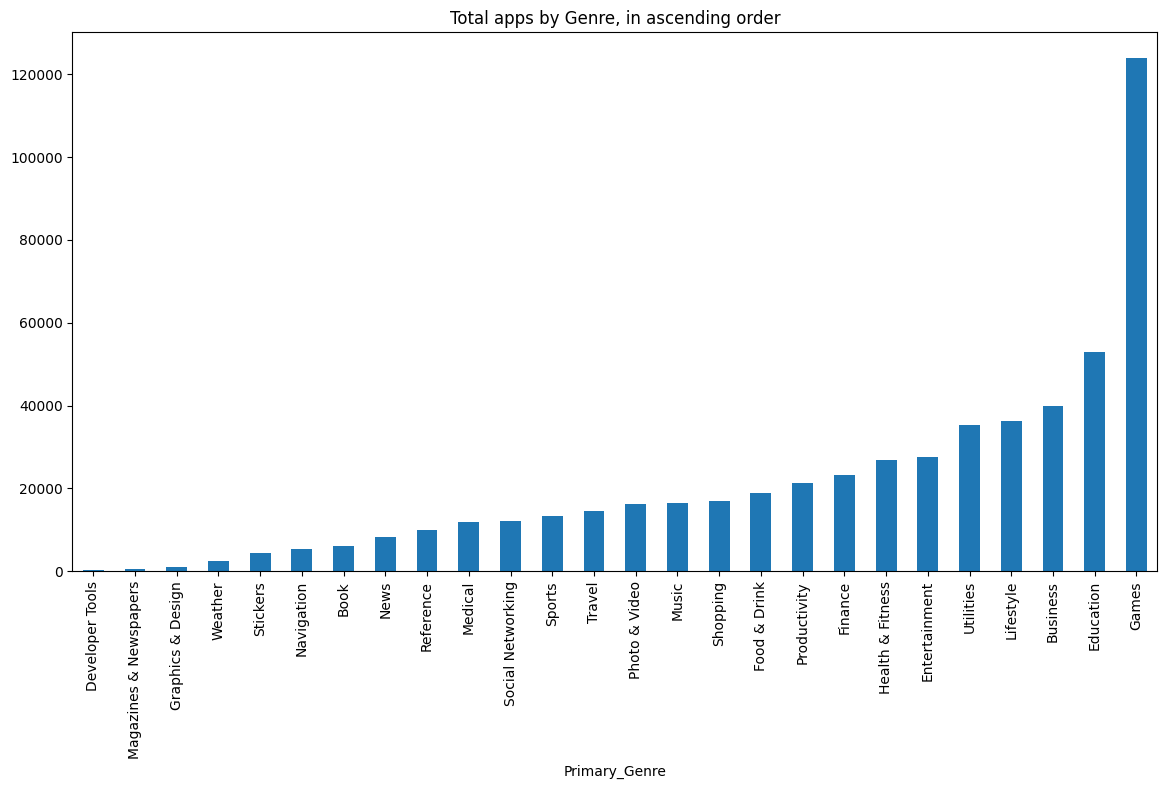

In [109]:
fig, ax = plt.subplots(figsize=(14, 7))

df['Primary_Genre'].value_counts().sort_values(ascending = True).plot(kind="bar", title="Total apps by Genre, in ascending order", ax=ax)

### Stacked bar chart

For the following chart, we'll help you a bit with the generation of the data. What we're trying to accomplish is to have a sense of the distribution of the Free vs Paid apps, BUT, per the Category (or `Primary_Genre`) of the app. Here's the code:

In [7]:
genre_free_apps = df.groupby(['Primary_Genre', 'Free']).size().unstack(fill_value=0).rename(columns={
    False: 'Paid',
    True: 'Free'
})
genre_free_apps['Total'] = genre_free_apps['Free'] + genre_free_apps['Paid']
genre_free_apps.sort_values(by='Total', ascending=False).head()

Free,Paid,Free,Total
Primary_Genre,,,
Games,9143,114776,123919
Education,7799,45019,52818
Business,1104,38672,39776
Lifestyle,1784,34493,36277
Utilities,4544,30730,35274


##### 12. Create a multi-bar chart that compares the number of Free vs Paid apps per each Category/Genre

<Axes: title={'center': 'Apps per Genre: Free vs Paid'}, xlabel='Primary_Genre'>

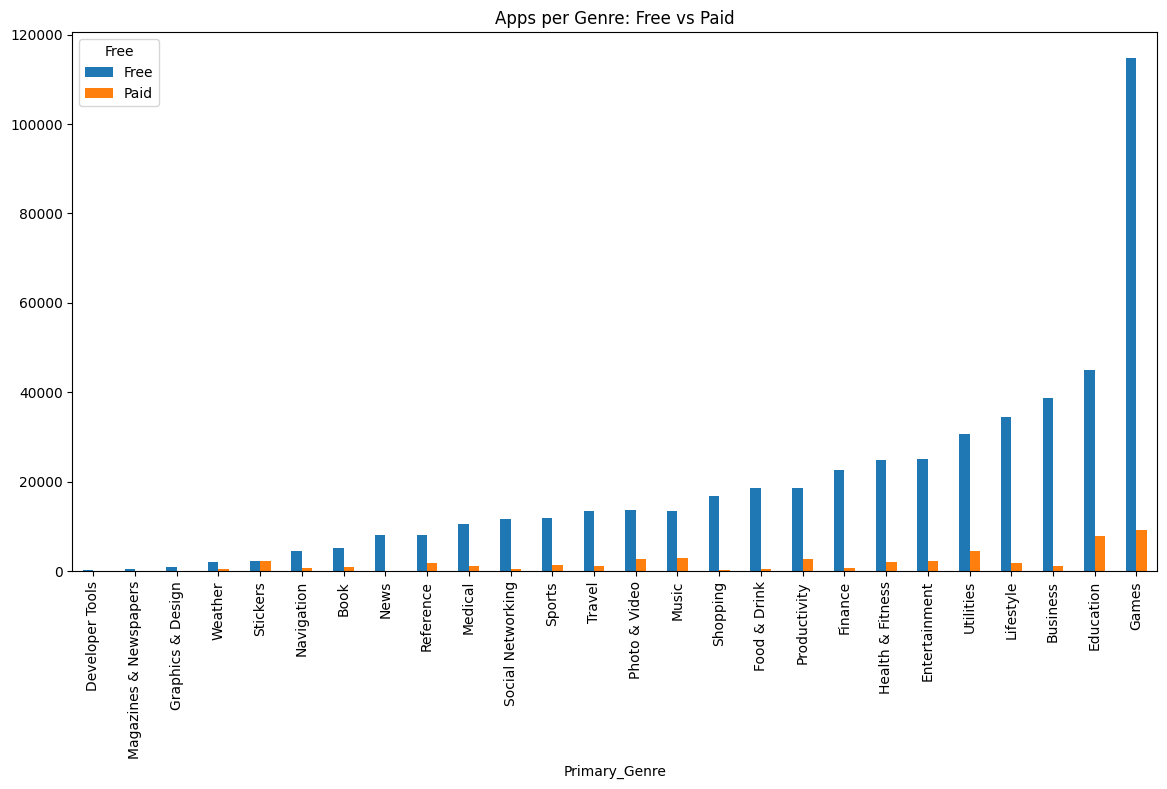

In [122]:
fig, ax = plt.subplots(figsize=(14, 7))

genre_free_apps.sort_values(by='Total', ascending=True)[["Free","Paid"]].plot(kind="bar", title="Apps per Genre: Free vs Paid", ax=ax)

##### 13. Modify the previous bar chart and show the Free vs Paid apps in a stacked form

<Axes: title={'center': 'Apps per Genre: Free vs Paid'}, xlabel='Primary_Genre'>

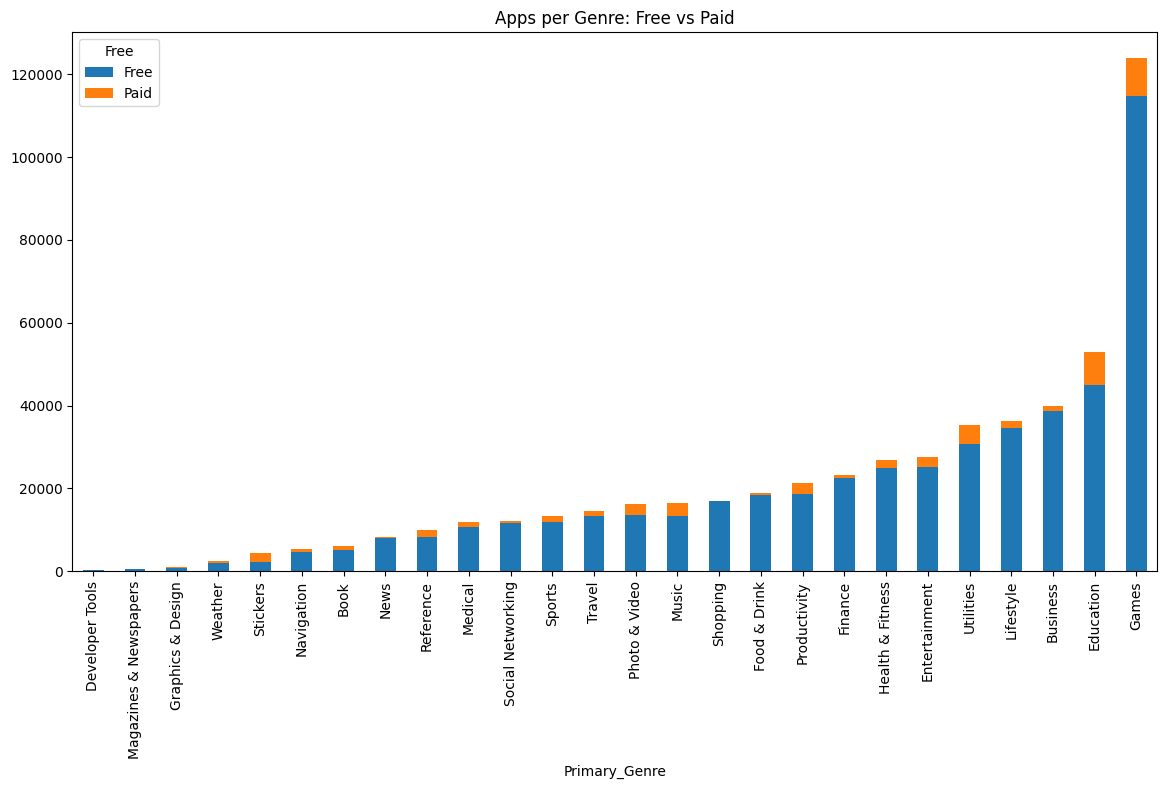

In [124]:
fig, ax = plt.subplots(figsize=(14, 7))

genre_free_apps.sort_values(by='Total', ascending=True)[["Free","Paid"]].plot(kind="bar", title="Apps per Genre: Free vs Paid",stacked=True, ax=ax)

### Final challenge

Finally, here's a challenge to wrap it up that won't be graded, it's just for fun!

Can you create a Scatter plot that shows, as we did before, the relationship between the Review and Rating for the Top 20 apps, but color each marker (bubble) based on the category of the app?

This will require some code, so it's not graded, just for fun!

Your plot should look something like:

![](./scatter-plot-challenge.png)

ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 20.

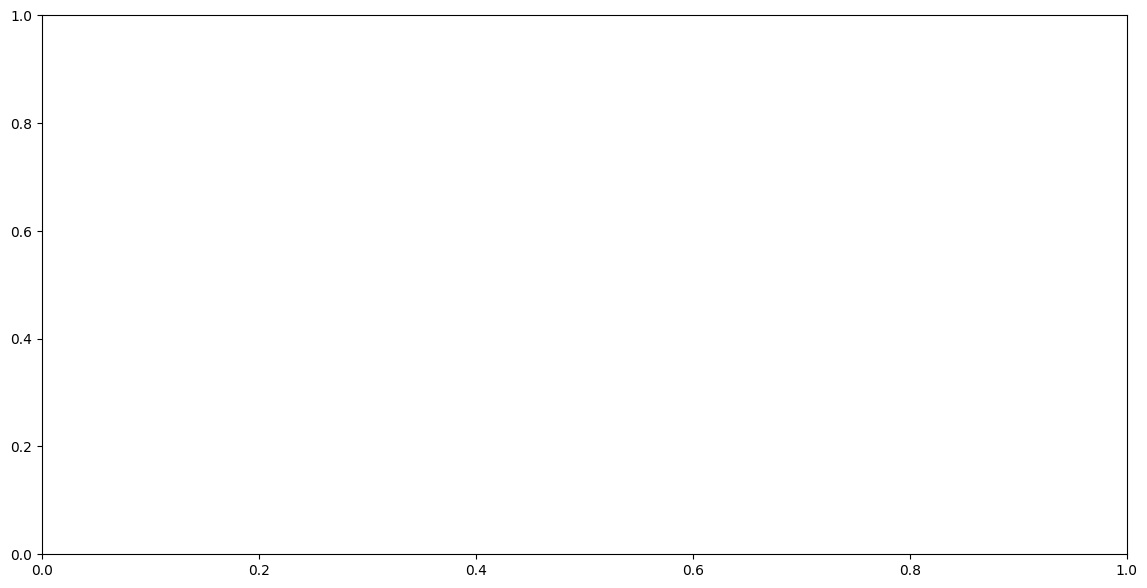

In [28]:
fig, ax = plt.subplots(figsize=(14, 7))

top_20_apps_df.plot(kind="scatter", x="Reviews", y="Average_User_Rating"
                    , title="20 Most popular apps: Reviews vs Rating"
                    , s = "Average Size in MB", ax=ax)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
